<a href="https://colab.research.google.com/github/gykim80/mcdtnft/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Oct 31 22:53:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install --upgrade keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394 kB 15.4 MB/s 


In [3]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 2s 0us/step


In [5]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.tight_layout()

25/25 [==============================] - 65s 3s/step


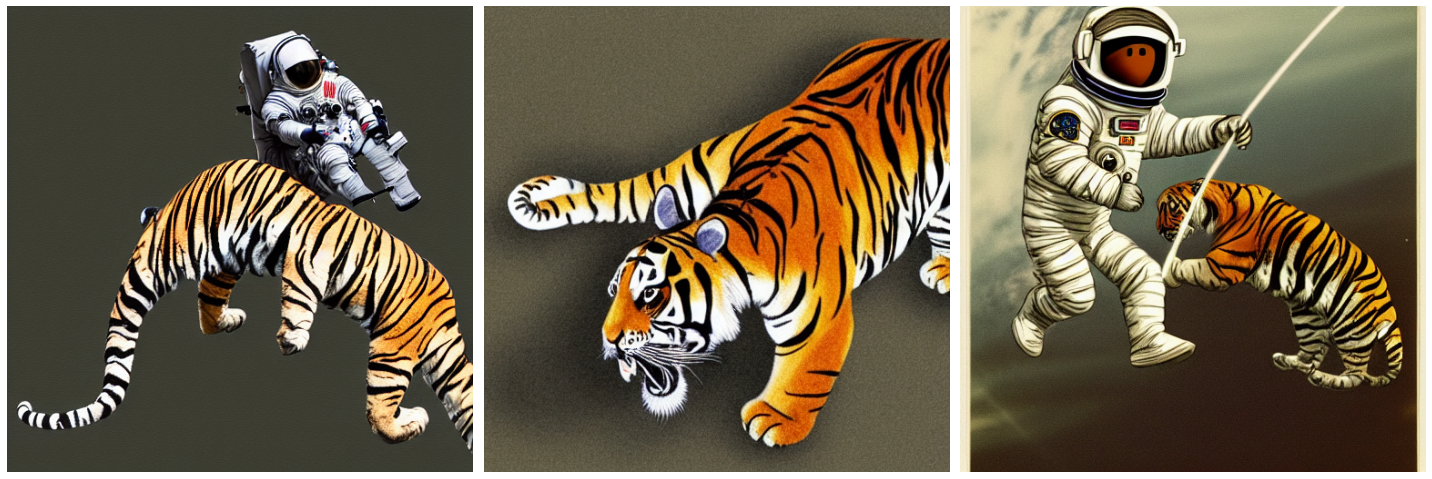

In [8]:
images = model.text_to_image("photograph of an astronaut riding a tiger", batch_size=3)

plot_images(images)

## 한글 -> 영어 번역

In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

translation = translator.translate("펭귄이 곰한테 뽀뽀하는 모습")

translation

'A penguin kisses a bear'

## 함수화

펭귄이 곰한테 뽀뽀하는 모습
A penguin kisses a bear
25/25 [==============================] - 61s 2s/step


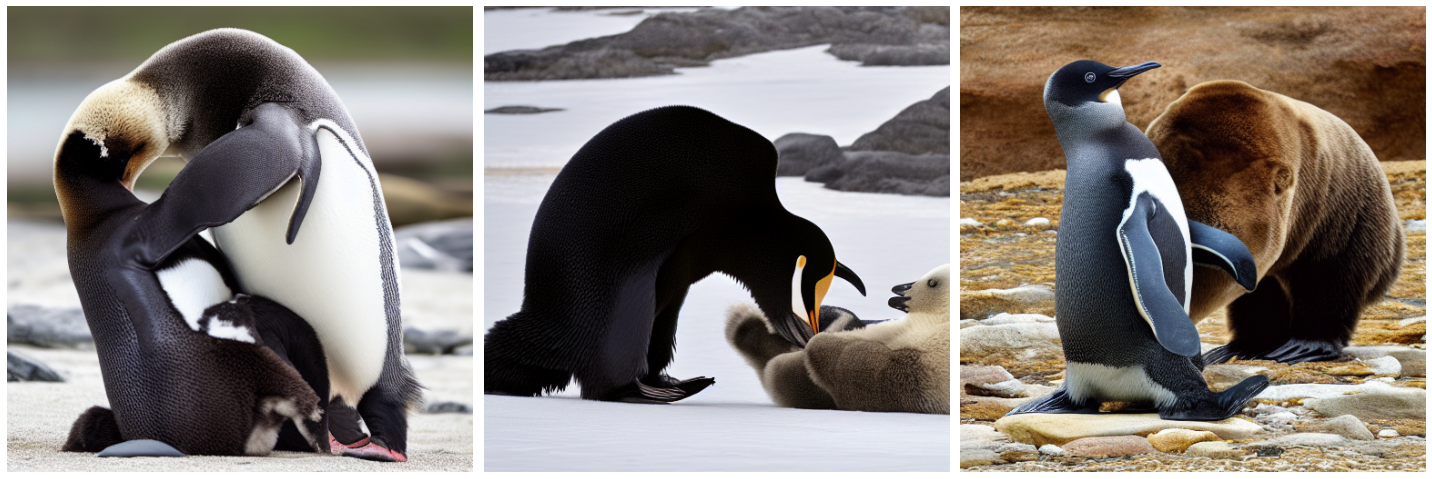

In [ ]:
def generate_images(text, n=3):
    print(text)
    translation = translator.translate(text)
    print(translation)

    images = model.text_to_image(translation, batch_size=n)

    return images

images = generate_images("펭귄이 곰한테 뽀뽀하는 모습")

plot_images(images)

## 그림 생성 앱 만들기

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 11.6 MB 7.0 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 106 kB 76.1 MB/s 
     |████████████████████████████████| 212 kB 74.7 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 2.3 MB 49.6 MB/s 
     |████████████████████████████████| 272 kB 63.7 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 4.0 MB 56.6 MB/s 
     |████████████████████████████████| 593 kB 55.4 MB/s 
     |████████████████████████████████| 856 kB 70.7 MB/s 


In [ ]:
import gradio as gr

def inference(text):
    image = generate_images(text, 1).squeeze()
    return image

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://09d11c9e318b4c6e.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


이세계의 소녀가 사과를 먹는 일러스트
Illustration of a girl from another world eating an apple
25/25 [==============================] - 42s 1s/step
수많은 사람들이 동시에 모나리자를 보면서 웃는 사진
Photo of countless people smiling while looking at the Mona Lisa at the same time
25/25 [==============================] - 28s 1s/step
어두운 방안에서 컴퓨터 앞에 혼자 앉아 열심히 개발하면서 머리를 쥐어뜯는 개발자의 모습
Developer sitting alone in front of computer in a dark room, racking his brain while working hard
25/25 [==============================] - 29s 1s/step
두명의 아이들이 플레이스테이션 FPS 게임을 하면서 집중하고 있는 사이버펑크 스타일의 그림
Cyberpunk-style illustration of two kids concentrating on playing PlayStation FPS game
25/25 [==============================] - 29s 1s/step
유니콘에 타고 있는 우주인의 사진
Photo of an astronaut riding a unicorn
25/25 [==============================] - 28s 1s/step
무지개색 유니콘에 타고 있는 우주인의 사진
Photo of astronaut riding on a rainbow-colored unicorn
25/25 [==============================] - 29s 1s/step
Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f09ffb168d0>,
 'http://127.0.0.1:7860/',
 'https://09d11c9e318b4c6e.gradio.app')